In [ ]:
#### https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/

Gus Marquez DS687

Captain's OpenCV Object Detection in Image

(Help for these code can be found in OpenCV and MyGreatLearning)

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES and SETUP

In [2]:
# IMPORT
import numpy as np
import argparse
import cv2
import cv2
import numpy as np


In [3]:
# YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/colab/yolov3.weights", "/content/drive/MyDrive/colab/yolov3.cfg")
# Classes
classes = []
with open("/content/drive/MyDrive/colab/coco.names", "r") as f: 
  classes = [line.strip() for line in f.readlines()] 
outputlayers = net.getUnconnectedOutLayersNames() 


0.7409734 2 car
0.78628147 2 car
0.6256758 2 car
0.59571993 2 car
0.9994194 0 person
0.9996108 0 person
0.9723192 0 person
0.9811216 0 person
0.6646031 24 backpack
0.9912184 24 backpack
0.7098107 24 backpack
0.86912775 2 car


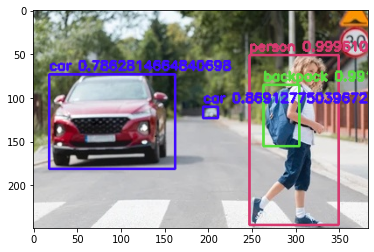

In [ ]:
# GET PHOTO
img = cv2.imread("/content/drive/MyDrive/img77.jpg")

# SHAPE, BLOB and DETECT
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),     swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(outputlayers)

# DETECTION
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
        print(confidence, class_id, classes[class_id])
        # DETECTION
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)
        # LOCATION
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        # APPEND ALL
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
    
# NMS
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# BOXES
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]]) + " " + str(confidences[i])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
            
# DISPLAY
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

0.66815376 7 truck
0.82420796 7 truck
0.9932544 7 truck
0.97173727 7 truck
0.87679696 7 truck
0.6819697 7 truck
0.85862887 0 person
0.71120834 0 person
0.7982645 0 person
0.97752374 0 person
0.9953296 0 person
0.70185363 0 person
0.9416049 0 person
0.5046967 0 person
0.9881887 0 person
0.86345387 0 person
0.926334 0 person
0.90385264 0 person


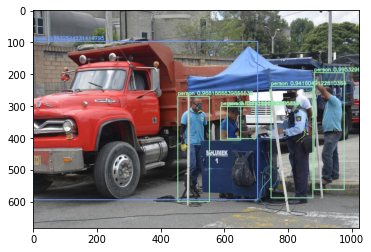

0.7409734 2 car
0.78628147 2 car
0.6256758 2 car
0.59571993 2 car
0.9994194 0 person
0.9996108 0 person
0.9723192 0 person
0.9811216 0 person
0.6646031 24 backpack
0.9912184 24 backpack
0.7098107 24 backpack
0.86912775 2 car


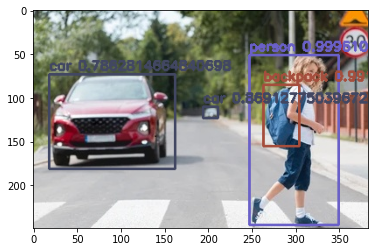

0.6662212 2 car
0.615172 2 car
0.827444 2 car
0.9943176 2 car
0.5020666 2 car
0.8070741 2 car
0.69898707 2 car
0.5885576 2 car
0.99060357 2 car
0.98763114 2 car
0.985894 0 person
0.9648944 0 person
0.9776577 0 person
0.9956932 0 person
0.79207534 0 person
0.9962345 0 person
0.63287234 0 person
0.9559694 0 person
0.97307175 0 person
0.99810445 0 person
0.82967514 2 car
0.87696326 0 person
0.8935094 0 person
0.524082 0 person
0.93611217 0 person
0.76404697 0 person
0.501784 0 person
0.86168706 0 person
0.686807 25 umbrella
0.54609025 2 car
0.60397714 2 car
0.6398083 2 car
0.6130279 2 car
0.9297703 2 car
0.68151665 2 car
0.9708535 0 person
0.88543457 0 person


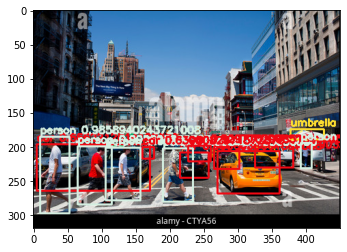

0.9723094 0 person
0.999759 0 person
0.6260108 2 car
0.7769352 2 car
0.6211263 0 person
0.7274385 2 car
0.8821103 2 car
0.96901387 2 car
0.84829867 2 car
0.99477226 1 bicycle
0.96271014 1 bicycle
0.976306 1 bicycle
0.79609805 1 bicycle


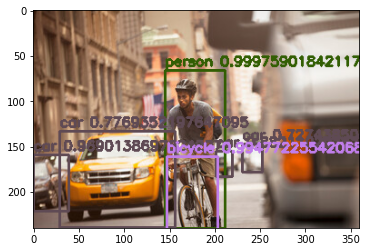

0.9833956 0 person
0.6275783 0 person
0.9990674 0 person
0.9597452 0 person
0.99157286 0 person
0.8420596 24 backpack
0.7176865 2 car
0.7021973 2 car
0.60941887 0 person
0.8176219 0 person
0.87997085 0 person
0.5528549 2 car
0.62790376 24 backpack
0.5111727 2 car
0.62278 2 car
0.52304107 2 car
0.887951 2 car
0.6420856 2 car
0.9548954 2 car
0.6966151 2 car
0.6894171 2 car
0.57496595 2 car
0.7271183 0 person
0.6451511 0 person
0.6635071 0 person
0.5114709 0 person


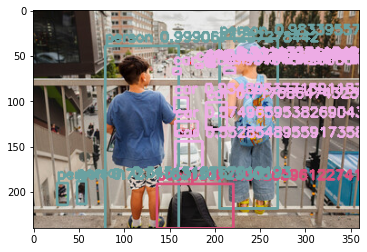

0.6616036 5 bus
0.99845004 5 bus
0.9973642 5 bus
0.5334317 7 truck
0.817874 5 bus
0.7269476 5 bus
0.6040374 2 car
0.9779106 2 car
0.88918805 2 car
0.5161337 7 truck
0.75381726 0 person
0.5444503 0 person
0.82271385 0 person
0.9852511 0 person
0.9242266 0 person
0.55813295 26 handbag
0.5216823 0 person
0.8877124 26 handbag
0.9783681 2 car
0.9002869 2 car
0.70270765 2 car
0.50704813 0 person
0.77092683 2 car
0.5855809 2 car
0.98882365 2 car
0.92528623 2 car
0.9579287 2 car
0.55481815 2 car
0.61784875 0 person
0.8495212 0 person
0.80348164 0 person


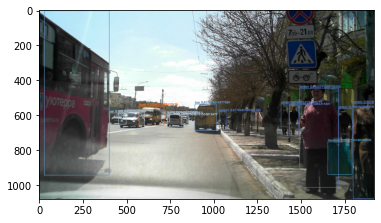

0.7327739 5 bus
0.85494906 2 car
0.5579008 2 car
0.96816874 2 car
0.64069945 2 car
0.73094636 2 car
0.6641969 0 person
0.95784706 0 person
0.66436 0 person


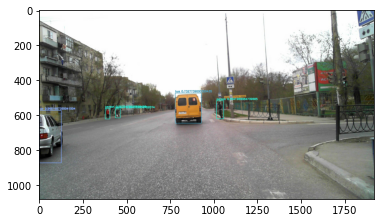

0.5433557 7 truck
0.9040041 2 car
0.98075855 2 car
0.69959736 7 truck
0.63567734 2 car
0.96496075 2 car
0.94273686 2 car
0.8973031 2 car
0.97744036 2 car
0.72744703 2 car
0.9232534 2 car
0.79257166 2 car
0.6159693 2 car
0.9904639 2 car
0.9912869 2 car
0.83507526 2 car
0.96554863 2 car
0.9595473 2 car
0.82018477 2 car
0.9850917 2 car
0.7972773 2 car
0.84588724 2 car
0.9850469 2 car
0.90454376 2 car
0.7681506 2 car
0.9796702 2 car
0.848935 2 car


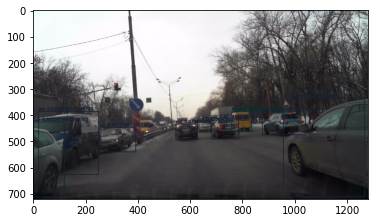

0.75958675 7 truck
0.6542245 7 truck
0.67564565 7 truck
0.77899295 7 truck
0.90616184 7 truck
0.7310308 7 truck
0.93703234 7 truck
0.7996617 7 truck
0.88759714 7 truck
0.8982388 7 truck
0.781409 7 truck
0.71660334 7 truck
0.7573572 7 truck
0.57038295 7 truck
0.9519755 7 truck
0.73524725 0 person
0.8012889 3 motorbike
0.9700042 0 person
0.7675159 0 person
0.9045305 1 bicycle
0.8942193 0 person
0.6567801 0 person
0.9830591 0 person
0.67752045 1 bicycle
0.7621812 0 person
0.66532 0 person


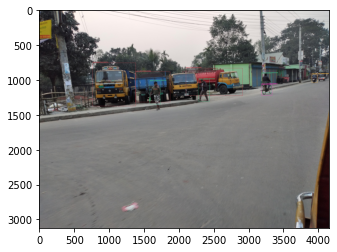

In [4]:


import cv2
from google.colab.patches import cv2_imshow
import os
import glob
from PIL import Image


images=glob.glob("/content/drive/MyDrive/colab/testtwo/*.jpg")
for image in images:

  # GET PHOTO
  img = cv2.imread(image)

  # SHAPE, BLOB and DETECT
  height, width, channels = img.shape
  blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),     swapRB=True, crop=False)
  net.setInput(blob)
  outs = net.forward(outputlayers)

  # DETECTION
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5:
          print(confidence, class_id, classes[class_id])
          # DETECTION
          center_x = int(detection[0] * width)
          center_y = int(detection[1] * height)
          w = int(detection[2] * width)
          h = int(detection[3] * height)
          # LOCATION
          x = int(center_x - w / 2)
          y = int(center_y - h / 2)
          # APPEND ALL
          boxes.append([x, y, w, h])
          confidences.append(float(confidence))
          class_ids.append(class_id)
      
  # NMS
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  colors = np.random.uniform(0, 255, size=(len(classes), 3))

  # BOXES
  for i in range(len(boxes)):
    if i in indexes:
      x, y, w, h = boxes[i]
      label = str(classes[class_ids[i]]) + " " + str(confidences[i])
      color = colors[class_ids[i]]
      cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
      cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
              
  # DISPLAY
  import matplotlib.pyplot as plt
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()